# Industrial process modelling
The following picture describe the system modeled.

It is composed by:
* an industrial bath with a given volume and thermal loss area with the ambiant temperature.
* a heat pump using a low temperature district heating network as cold source
* a hysteresis controller following a given pattern for the temperature of the bath
* two heat exchangers connecting the components with fixed mass flow for primary (HExch/HP), secondary (HP/HExch) and tertiary (HExch/Bath) fluid loops

<img src="./figures/indus_bath.png" alt="Model" style="width: 750px;"/>

In [1]:
import numpy as np
import pandas as pd
import energytechnomodels as models

In [2]:
import matplotlib.pyplot as plt

In [3]:
set_point = [68, 0, 68, 0, 68, 0, 68, 0, 0, 0, 0, 0, 68, 0]*2
index = pd.date_range(start="2000/01/01", freq="12H", periods=len(set_point))
set_point = pd.Series(set_point, index=index)
set_point_minutes = set_point.resample("Min").pad()

In [4]:
hp = models.HeatPump(50E3, 80.0, 20.0)
ib = models.Bath(2.7, 2.7, t_bath_init=50.0)
hc = models.Hysteresis(x_max=76, x_min=68, y_init=1)

res_t_bath = pd.Series()
res_p_elec = pd.Series()

for i in range(60*24*7):
    hc.x_min = set_point_minutes.iloc[i]
    
    ib.step(60)
    hc.x = ib.t_bath
    
    hc.step(60)
    hp.io = hc.y
    
    hp.step(60)
    ib.p_heat = hp.p_sink
    
    res_t_bath[ib.time] = ib.t_bath
    res_p_elec[hp.time] = hp.p_elec

<IPython.core.display.Javascript object>


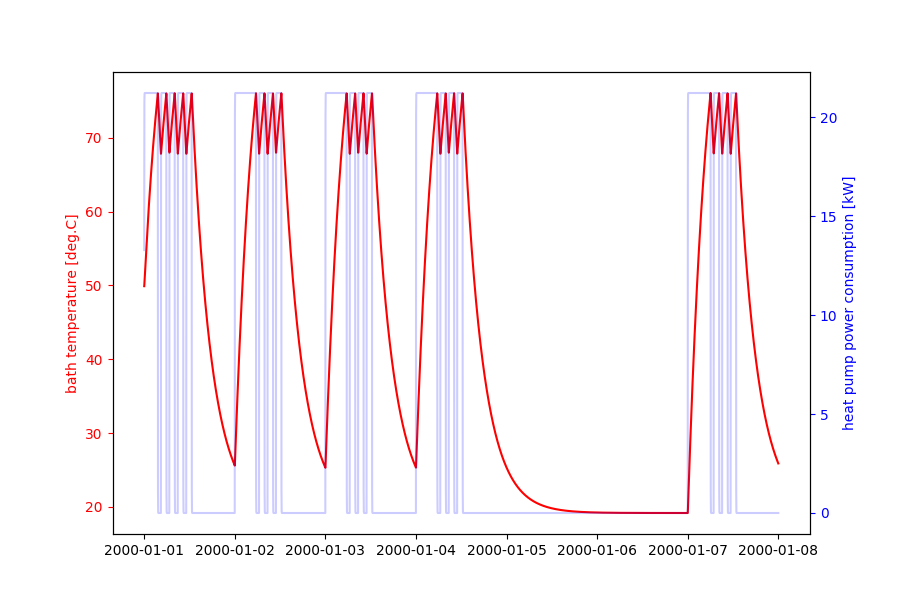

Text(0,0.5,'heat pump power consumption [kW]')

In [5]:
%matplotlib notebook

fig, ax1 = plt.subplots(figsize=(9, 6))
ax2 = ax1.twinx()

ax1.plot(res_t_bath, '-r')
ax1.tick_params('y', colors='r')
ax1.set_ylabel('bath temperature [deg.C]', color='r')

ax2.plot(res_p_elec*1E-3, '-b', alpha=0.2)
ax2.tick_params('y', colors='b')
ax2.set_ylabel('heat pump power consumption [kW]', color='b')